In [1]:
import re

import pandas as pd 
import numpy as np
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier
from sklearn.svm import SVC
from sklearn import metrics
import os
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_csv('Uli_data.csv')

In [3]:
OneDgm = Data[Data.freq == 1]
OneDgm = OneDgm[OneDgm.trial == 5]
OneDgm.head()

,freq,trial,dim,birth,death
88669,1,5,-2,11.4570,36.0350
88670,1,5,-2,11.6030,36.0350
88671,1,5,-1,4.1397,36.0350
88672,1,5,0,4.1885,4.7006
88673,1,5,0,4.2057,4.7429


In [4]:
# Code to reshape the data in the groupby command below
def reshapeVec(g):
    A = np.array([g.dim,g.birth,g.death])
    A = A.T
    return A 

In [5]:
DgmsDF = Data.groupby(['freq', 'trial']).apply(reshapeVec)
DgmsDF = DgmsDF.reset_index()
DgmsDF = DgmsDF.rename(columns = {0:'CollectedDgm'})

In [6]:
DgmsDF.head()

,freq,trial,CollectedDgm
0,0,1,"[[-2.0, 63.375, 493.76], [-2.0, 74.82600000000..."
1,0,2,"[[-2.0, 42.301, 251.35], [-2.0, 44.12699999999..."
2,0,3,"[[-2.0, 24.084, 100.21], [-2.0, 24.43300000000..."
3,0,4,"[[-2.0, 16.221, 52.696999999999996], [-2.0, 16..."
4,0,5,"[[-2.0, 11.783, 36.272], [-2.0, 11.93, 36.272]..."


In [7]:
def getDgm(A, dim = 0):
    if type(dim) != str:
        A = A[np.where(A[:,0] == dim)[0],1:]
    elif dim == 'essential':
        A = A[np.where(A[:,0] <0)[0],:]
    return(A)

In [8]:
DgmsDF['Dgm1'] = DgmsDF.CollectedDgm.apply(lambda x: getDgm(x, dim = 1))
DgmsDF['Dgm0'] = DgmsDF.CollectedDgm.apply(lambda x: getDgm(x, dim = 0))
DgmsDF['DgmInf'] = DgmsDF.CollectedDgm.apply(lambda x: getDgm(x, dim = 'essential'))

In [9]:
DgmsDF.head()

,freq,trial,CollectedDgm,Dgm1,Dgm0,DgmInf
0,0,1,"[[-2.0, 63.375, 493.76], [-2.0, 74.82600000000...","[[59.183, 244.09], [59.518, 244.29], [60.372, ...","[[47.053999999999995, 71.388], [48.099, 50.716...","[[-2.0, 63.375, 493.76], [-2.0, 74.82600000000..."
1,0,2,"[[-2.0, 42.301, 251.35], [-2.0, 44.12699999999...","[[33.555, 251.35], [37.09, 37.137], [37.26, 37...","[[29.142, 38.969], [29.769000000000002, 30.07]...","[[-2.0, 42.301, 251.35], [-2.0, 44.12699999999..."
2,0,3,"[[-2.0, 24.084, 100.21], [-2.0, 24.43300000000...","[[15.835999999999999, 100.21], [19.13, 99.2320...","[[14.26, 19.491], [14.269, 14.397], [14.356, 1...","[[-2.0, 24.084, 100.21], [-2.0, 24.43300000000..."
3,0,4,"[[-2.0, 16.221, 52.696999999999996], [-2.0, 16...","[[7.8871, 52.696999999999996], [9.4849, 44.928...","[[7.2928, 9.4729], [7.3087, 7.3396], [7.3128, ...","[[-2.0, 16.221, 52.696999999999996], [-2.0, 16..."
4,0,5,"[[-2.0, 11.783, 36.272], [-2.0, 11.93, 36.272]...","[[4.7617, 36.272], [4.8185, 36.260999999999996...","[[4.3036, 4.3046], [4.3337, 4.7526], [4.431, 4...","[[-2.0, 11.783, 36.272], [-2.0, 11.93, 36.272]..."


In [10]:
def label(index):
    if 0 <= index <= 19:
        return 'male_neutral'
    elif 20<= index <=39:
        return 'male_bodybuilder'
    elif 40<= index <=59:
        return 'male_fat'
    elif 60<= index <=79:
        return 'male_thin'
    elif 80<= index <=99:
        return 'male_average'
    elif 100<= index <=119:
        return 'female_neutral'
    elif 120<= index <=139:
        return 'female_bodybuilder'
    elif 140<= index <=159:
        return 'female_fat'
    elif 160<= index <=179:
        return 'female_thin'
    elif 180<= index <=199:
        return 'female_average'
    elif 200<= index <=219:
        return 'child_neutral'
    elif 220<= index <=239:
        return 'child_bodybuilder'
    elif 240<= index <=259:
        return 'child_fat'
    elif 260<= index <=279:
        return 'child_thin'
    elif 280<= index <=299:
        return 'child_average'
    else:
        print('What are you giving me?')

In [11]:
DgmsDF['TrainingLabel'] = DgmsDF.freq.apply(label)
DgmsDF= DgmsDF.sample(frac=1)
DgmsDF.head()

,freq,trial,CollectedDgm,Dgm1,Dgm0,DgmInf,TrainingLabel
345,34,6,"[[-2.0, 6.9269, 19.973], [-2.0, 7.2128, 19.973...","[[2.6501, 19.532], [3.0617, 19.44], [3.1175, 1...","[[7.0266, 7.0268], [7.029, 7.0292], [7.3198, 7...","[[-2.0, 6.9269, 19.973], [-2.0, 7.2128, 19.973...",male_bodybuilder
864,86,5,"[[-2.0, 11.870999999999999, 35.335], [-2.0, 11...","[[4.8306, 27.249000000000002], [4.9837, 35.221...","[[4.1402, 4.1469], [4.7265, 4.7645], [11.56200...","[[-2.0, 11.870999999999999, 35.335], [-2.0, 11...",male_average
2920,292,1,"[[-2.0, 78.571, 467.42], [-2.0, 88.024, 467.42...","[[62.108000000000004, 467.42], [76.00399999999...","[[57.122, 78.579], [58.00899999999999, 74.366]...","[[-2.0, 78.571, 467.42], [-2.0, 88.024, 467.42...",child_average
21,2,2,"[[-2.0, 42.218, 257.25], [-2.0, 43.902, 257.25...","[[33.479, 257.25], [36.03, 36.052], [37.073, 3...","[[28.333000000000002, 38.575], [28.96, 38.0719...","[[-2.0, 42.218, 257.25], [-2.0, 43.902, 257.25...",male_neutral
2139,213,10,"[[-2.0, 4.2832, 4.2834], [-2.0, 4.2832, 4.2834...","[[4.2831, 4.2834], [4.2831, 4.2832], [4.2831, ...","[[4.2831, 4.2831], [4.2831, 4.2831], [4.2831, ...","[[-2.0, 4.2832, 4.2834], [-2.0, 4.2832, 4.2834...",child_neutral


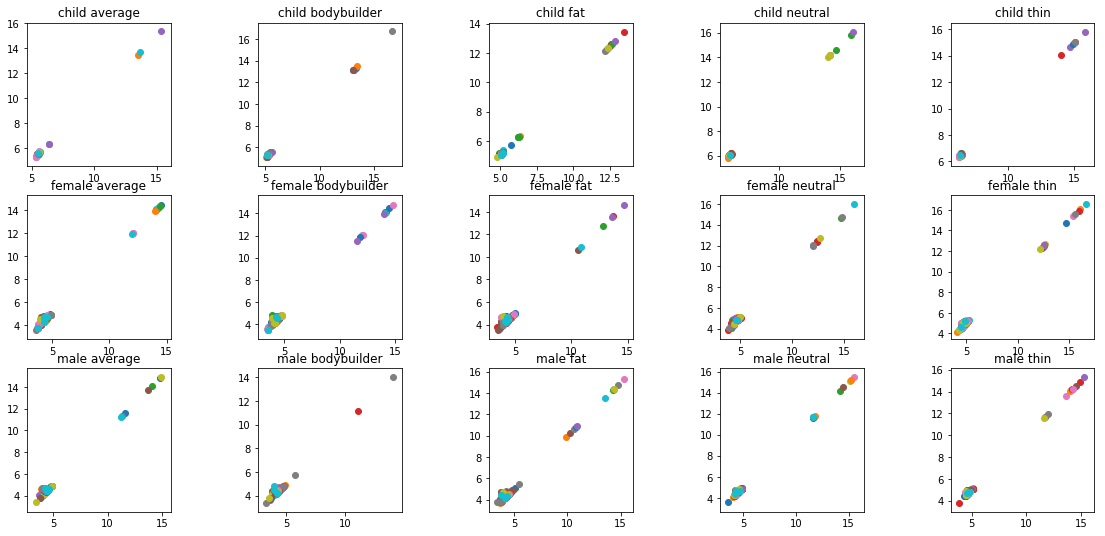

In [17]:
freq = 5
SampleDF = DgmsDF[DgmsDF.trial == freq].sample(frac=1)
labels = list(set(SampleDF.TrainingLabel))
labels.sort()

fig, AX = plt.subplots(3,5,figsize = (20,9))

for i,ax in enumerate(AX.flat):

    label = labels[i]
    SubsampleDF = SampleDF[SampleDF.TrainingLabel == label]

    ax.set_title(label.replace('_',' '))

    for dgm in SubsampleDF.Dgm0:

        ax.scatter(dgm[:,0],dgm[:,1])
    ax.axis('square')

In [26]:
SampleDF['TrainingLabel'].tolist()

['male_bodybuilder',
 'male_thin',
 'female_fat',
 'child_thin',
 'male_fat',
 'male_bodybuilder',
 'female_neutral',
 'female_neutral',
 'female_neutral',
 'male_bodybuilder',
 'male_neutral',
 'child_neutral',
 'child_bodybuilder',
 'female_fat',
 'child_thin',
 'male_neutral',
 'child_bodybuilder',
 'child_average',
 'male_neutral',
 'female_thin',
 'female_thin',
 'female_fat',
 'child_thin',
 'female_thin',
 'female_bodybuilder',
 'child_bodybuilder',
 'child_thin',
 'child_thin',
 'female_average',
 'child_bodybuilder',
 'female_average',
 'child_thin',
 'male_average',
 'male_bodybuilder',
 'child_fat',
 'female_average',
 'female_bodybuilder',
 'female_bodybuilder',
 'child_bodybuilder',
 'child_fat',
 'female_thin',
 'male_thin',
 'male_neutral',
 'male_average',
 'female_neutral',
 'child_thin',
 'child_fat',
 'female_average',
 'child_neutral',
 'female_average',
 'male_thin',
 'child_average',
 'male_neutral',
 'female_average',
 'child_thin',
 'female_neutral',
 'female_av